# Trade data including exports and imports

In [1]:
import pandas as pd
import numpy as np

#import requests
import zipfile as zf 
from pathlib import Path
import matplotlib.pyplot as plt

### 0. Comment 3 cells below after data is downloaded and unzipped

In [4]:
'''
url="http://fenixservices.fao.org/faostat/static/bulkdownloads/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip"
r = requests.get(url)
#300 MB dowload, slow...

filename = Path('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip')
filename.write_bytes(r.content) 

files = zf.ZipFile('Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip', 'r')
files.extractall('')
files.close()
'''

'\nurl="http://fenixservices.fao.org/faostat/static/bulkdownloads/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip"\nr = requests.get(url)\n#300 MB dowload, slow...\n\nfilename = Path(\'Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip\')\nfilename.write_bytes(r.content) \n\nfiles = zf.ZipFile(\'Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip\', \'r\')\nfiles.extractall(\'\')\nfiles.close()\n'

### You can just start here if you download the linked file and unzip it in the Data folder

In [2]:
pd_main = pd.read_csv('../Data/input_2023/Trade_DetailedTradeMatrix_E_All_Data_(Normalized)/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv', sep=',', encoding='latin1')


In [7]:
len(set(pd_main['Reporter Countries'].unique()).union(set(pd_main['Partner Countries'].unique())))

220

In [ ]:
print(sorted(pd_main["Year Code"].unique()))
print(pd_main["Reporter Countries"].unique())


[np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'C

### OK about flags raised in some data points after reading this http://www.fao.org/3/i3664e/i3664e.pdf

Delete rows with same origin and destination, they relate to in-country free trade zones because "Special trade it also includes imports into and exports from customs warehouses sand free zones or ports. In Special trade goods are recorded when cleared through customs for shome use or for export. Special imports include goods for domestic consumption and withdrawals from bonded warehouses or free zones for purposes of domestic consumption.

Special exports comprise exports of goods wholly or partly produced or manufactured in the country, together with exports of "nationalized" goods;" 
see http://fenixservices.fao.org/faostat/static/documents/T/T_e.pdf 

In [10]:
pd_main.tail()

,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
50428175,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export value,1988,1988,1000 USD,1.0,A
50428176,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export value,1992,1992,1000 USD,8.0,A
50428177,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export value,1999,1999,1000 USD,2.0,A
50428178,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export value,2004,2004,1000 USD,2.0,A
50428179,150,'528,Netherlands (Kingdom of the),181,'716,Zimbabwe,564,'24212.02,Wine,5922,Export value,2020,2020,1000 USD,14.0,A


In [12]:
same_country = pd_main.loc[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])]
same_country.tail()

,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
46606155,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export value,2009,2009,1000 USD,3458.0,A
46606162,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export value,2010,2010,1000 USD,4103.0,A
46606169,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export value,2011,2011,1000 USD,12583.0,A
46606176,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export value,2012,2012,1000 USD,6860.0,A
46606183,203,'724,Spain,203,'724,Spain,892,'22230.02,"Yoghurt, with additives",5922,Export value,2013,2013,1000 USD,9001.0,A


In [13]:
print('National-trade instances:',len(same_country.index))
print('International-trade instances:',len(pd_main.index) - len(same_country.index))

pd_impexp = pd_main.drop(pd_main[(pd_main['Reporter Countries'] == pd_main['Partner Countries'])].index)

print(len(pd_main.index))

National-trade instances: 64461
International-trade instances: 50363719
50428180


## 1. Keep useful columns: 
Remove some unused columns: Flag column and Year Flag column


In [14]:
useful_cols = ["Reporter Country Code","Reporter Countries","Partner Country Code","Partner Countries","Item","Item Code","Element","Year","Unit","Value"]
pd_usecol = pd_impexp[useful_cols] 
print('Data after removal: ',len(pd_impexp.index))

Data after removal:  50363719


In [15]:
pd_usecol.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item,Item Code,Element,Year,Unit,Value
0,2,Afghanistan,9,Argentina,"Cake, oilseeds nes",341,Import quantity,2017,t,463.11
1,2,Afghanistan,9,Argentina,"Cake, oilseeds nes",341,Import quantity,2019,t,1192.62
3,4,Algeria,2,Afghanistan,"Almonds, shelled",231,Import quantity,2005,t,3.00
5,2,Afghanistan,9,Argentina,"Cake, oilseeds nes",341,Import value,2017,1000 USD,85.00
6,4,Algeria,2,Afghanistan,"Almonds, shelled",231,Import value,2005,1000 USD,3.00


# 2. Understand unit and Element
**Unit:** can be specified in many different categories, we want to standardise it for the whole dataset so the values can be compared. \
**Element:** "Import Value / Quantities" or "Export Value / Quantities". 

Import Quantity / Export Quantity-> tonnes \
Import Value / Export Value -> money ($)

In [16]:
print(pd_usecol["Unit"].unique())

print(pd_usecol["Element"].unique())
pd_usecol.head(5)

['t' '1000 USD' '1000 An' 'An' 'No']
['Import quantity' 'Import value' 'Export quantity' 'Export value']


,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item,Item Code,Element,Year,Unit,Value
0,2,Afghanistan,9,Argentina,"Cake, oilseeds nes",341,Import quantity,2017,t,463.11
1,2,Afghanistan,9,Argentina,"Cake, oilseeds nes",341,Import quantity,2019,t,1192.62
3,4,Algeria,2,Afghanistan,"Almonds, shelled",231,Import quantity,2005,t,3.00
5,2,Afghanistan,9,Argentina,"Cake, oilseeds nes",341,Import value,2017,1000 USD,85.00
6,4,Algeria,2,Afghanistan,"Almonds, shelled",231,Import value,2005,1000 USD,3.00


In [19]:
# Check if element theory holds: 

imp_exp = 'Export' # 'Export' or 'Import'
quantity_tonnes = pd_usecol[(pd_usecol["Unit"] == 't') & (pd_usecol["Element"] == imp_exp + ' quantity')] 
print( imp_exp + ', tonnes, quantity:',len(quantity_tonnes.index))

quantity_dollars = pd_usecol[(pd_usecol["Unit"] == '1000 USD') & (pd_usecol["Element"] == imp_exp + ' quantity')] 
print( imp_exp + ', 1000US$, quantity:',len(quantity_dollars.index))

value_dollars = pd_usecol[(pd_usecol["Unit"] == '1000 USD') & (pd_usecol["Element"] == imp_exp + ' value')] 
print( imp_exp + ', 1000US$, value:',len(value_dollars.index))

value_tonnes_exp= pd_usecol[(pd_usecol["Unit"] == 't') & (pd_usecol["Element"] == imp_exp + ' value')] 
print( imp_exp + ', tonnes, value:',len(value_tonnes_exp.index))


Export, tonnes, quantity: 12334135
Export, 1000US$, quantity: 0
Export, 1000US$, value: 12580734
Export, tonnes, value: 0


Based on the assessment we can Homogenise the Text from Quantity / Value to only indicate "Import/Export" (Takes 2 min)

In [ ]:
#pd_usecol.loc[:,'Element']= pd_usecol.Element.str.split().str[0] 

In [20]:
pd_usecol.loc[:,'Element']


0           Import quantity
1           Import quantity
3           Import quantity
5              Import value
6              Import value
                 ...       
50428175       Export value
50428176       Export value
50428177       Export value
50428178       Export value
50428179       Export value
Name: Element, Length: 50363719, dtype: object

## 3. Units: Keep only tonnes and USD 
Remove animals counted in units that have no clear translation to weight in tonnes (I tried, but there is no sensible source that provides homogeneous values across world regions). As shown below, it is less than 1% of the data.

**Unit values**

No= number "Bees"\
1000 An= Animals (chicken, birds, ducks, rabbits... geese)\
An= Animals (goat, cattle, rodents, asses, camel, mule, buffalo)\
t = tonnes, other products
1000 USD= 1000 US$


In [21]:
# test
print(pd_usecol["Unit"].unique())
# test
test = pd_usecol[(pd_usecol["Unit"] == "An") ]
#'1000 Head' 'Head' 'No' 
print(test["Item"].unique())

# Remove animal data: only keep data with unit: 'tonnes'or '1000 US$'.
pd_usedata = pd_usecol[(pd_usecol["Unit"] == 't') | (pd_usecol["Unit"] == '1000 USD')] 
print(pd_usedata["Unit"].unique())
print('Samples in Tonnes or $:',pd_usecol.shape[0])
print('Percentage of overlapping data',100*pd_usedata.shape[0]/pd_usecol.shape[0])

['t' '1000 USD' '1000 An' 'An' 'No']
['Bees']
['t' '1000 USD']
Samples in Tonnes or $: 50363719
Percentage of overlapping data 99.41617695071326


## 4. Remove Redundant Items
FAOSTAT responded via email that "Rice, paddy (rice milled equivalent)" is a summation of other included rice trades, and the only aggregated value that would lead to double counting, thus we eliminate it to keep greater detail

In [22]:
pd_usedata = pd_usedata[(pd_usedata["Item"] != 'Rice, paddy (rice milled equivalent)') ] 

## 5. Quality check

Below a satisfactory quality check based on the web interface of faostat: http://www.fao.org/faostat/en/#rankings/countries_by_commodity_imports

##### Top 20 Country Importers, Import Quantity of Wheat
##### 2018


Area
Item
Year
Value
Unit
Flag
Flag Description
Egypt	Wheat	2018	12522275.27	t	-	-
Indonesia	Wheat	2018	10096298.93	t	-	-
Algeria	Wheat	2018	8422056.96	t	-	-
Italy	Wheat	2018	7453326.38	t	-	-
Brazil	Wheat	2018	6817138.26	t	-	-
Philippines	Wheat	2018	6690772.39	t	-	-
Spain	Wheat	2018	6028087.66	t	-	-
Türkiye	Wheat	2018	5781711.54	t	-	-
Japan	Wheat	2018	5652192.67	t	-	-
Netherlands (Kingdom of the)	Wheat	2018	5566984.97	t	-	-
Viet Nam	Wheat	2018	5318644.73	t	-	-
Mexico	Wheat	2018	4920401.06	t	-	-
Bangladesh	Wheat	2018	4839308.1	t	-	-


In [30]:
year = 2023
element= "Import quantity"
product = "Wheat"


wheat = pd_usecol[(pd_usecol["Year"] == year) & (pd_usecol["Element"] == element) & (pd_usecol["Item"] == product) ]
top_imports = wheat.groupby('Reporter Countries')['Value'].sum().reset_index()
top_imports_sorted = top_imports.sort_values(by='Value', ascending=False).reset_index()

# Value top 
wheat_val = pd_usecol[(pd_usecol["Year"] == year) & (pd_usecol["Element"] == element) & (pd_usecol["Item"] == product) ]
top_imports_val = wheat_val.groupby('Reporter Countries')['Value'].sum().reset_index()
top_imports_sorted_val = top_imports_val.sort_values(by='Value', ascending=False).reset_index()


In [31]:
top_imports_sorted_val.head(10)

,index,Reporter Countries,Value
0,110,TÃ¼rkiye,11904621.50
1,23,"China, mainland",11877742.03
2,52,Indonesia,10869908.69
3,103,Spain,9636177.56
4,55,Italy,8674613.23
5,33,Egypt,8162036.71
6,75,Morocco,5871973.79
7,43,Germany,5163201.63
8,57,Japan,5026292.18
9,90,Philippines,4952792.89


/tmp/ipykernel_241899/4233565828.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_imports_sorted.loc[0:9,'Reporter Countries'],rotation=50,ha='right')
/tmp/ipykernel_241899/4233565828.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_imports_sorted_val.loc[0:9,'Reporter Countries'],rotation=50)


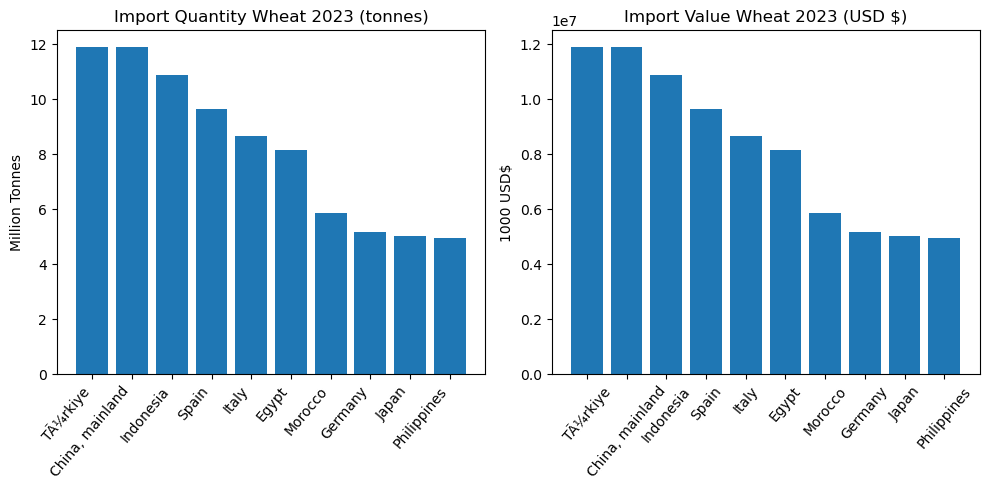

In [32]:
# Plot quantity
fig, axs = plt.subplots(1,2,figsize=(10,5))
element= "Import Quantity"
axs[0].bar(top_imports_sorted.loc[0:9,'Reporter Countries'],top_imports_sorted.loc[0:9,'Value']/1e6)
axs[0].set_xticklabels(top_imports_sorted.loc[0:9,'Reporter Countries'],rotation=50,ha='right')
axs[0].set_title(element +' ' + product + ' '+ str(year) + ' (tonnes)')
axs[0].set_ylabel('Million Tonnes')

#Plot value 
element= "Import Value"
axs[1].bar(top_imports_sorted_val.loc[0:9,'Reporter Countries'],top_imports_sorted_val.loc[0:9,'Value'])
axs[1].set_xticklabels(top_imports_sorted_val.loc[0:9,'Reporter Countries'],rotation=50, ha='right')
axs[1].set_title(element +' ' + product + ' '+ str(year) + ' (USD $)')
axs[1].set_ylabel('1000 USD$')
plt.tight_layout()

In [33]:
# Non overlap: Sudan for imports in $. 

# Check if wheat for sudan in 2018 exists in OG data:
wheat_og= pd_main[(pd_main["Year"] == year) & (pd_main["Element"] == element) & (pd_main["Item"] == product) & (pd_main["Reporter Countries"] == "Sudan")  ]


wheat_usecol= pd_usecol[(pd_usecol["Year"] == year) & (pd_usecol["Element"] == element) & (pd_usecol["Item"] == product) & (pd_usecol["Reporter Countries"] == "South Sudan")  ]
wheat_usecol
# Sudan Not found in downloaded data 
# Iran Wheat 2021 not found in downloaded data 
wheat_usecol.Value.sum()

np.float64(0.0)

In [ ]:
pd_usedata.to_csv('../Data/intermediate/Trade_filtered.csv',encoding = 'utf-8') #save data (~3 min)